In [14]:
# Peter Karras 2020
'''Takes GPP and date information from old master file and creates a new Machine Learning Master File
   With one column representing file names for the converted CSVs and the other column being their respective
   GPPs as pulled from the old master file or calculated with linear interpolation'''

'Takes GPP and date information from old master file and creates a new Machine Learning Master File\n   With one column representing file names for the converted CSVs and the other column being their respective\n   GPPs as pulled from the old master file or calculated with linear interpolation'

In [15]:
import pandas as pd
import os
import time

In [16]:
# Takes in a string that represents name of csv file and 
# converts that string to one that matches the date string present
# in the old master file (old master file refers to the raw excel file
# filled with extraneous data from BCI)that contains the date/times 
# for recorded GPP values
def change_csv_date(csv):
    year = csv[2:4]
    month = csv[5:7]
    day = csv[8:10]
    hour = csv[11:13]
    minute = csv[14:16]
    second = "00"
    print("Hour of ", csv, " is ", hour)
    if(int(hour) == 0):
        hour = "0"
    elif(int(hour) < 10):
        hour = hour[1:2]
    # No leading zeroes in day or month
    if(int(month) < 10):
        month = month[1:2]
    if(int(day) < 10):
        day = day[1:2]
    result = month + "/" + day + "/" + year + " " + hour + ":" + minute #+ ":" + second + " " + timeDay
    return result

In [17]:
# Takes in csv date (in format 'YYYY_MM_DD_HH_MM_bci_t') and checks to see if minutes are divisble by div
def check_csv_date(csv, div):
    result = False
    minute = int(csv[14:16])
    remainder = minute % div
    if(remainder == 0):
        result = True
    else:
        result = False
    return result

In [18]:
print(check_csv_date("2015_03_14_14_00_bci_t.csv",30))

True


In [33]:
# Grabs all GPP values and dates from master file (as defined above)
masterfileLocation = r"C:\Users\Peter\Desktop\Thermo_R_Code\FinalThermo\new2"
os.chdir(masterfileLocation)
col_list = ["date", "GPP"]
masterFileName = "all-30min-Apr2018_working.csv"
dateGPPList = pd.read_csv(masterFileName, usecols=col_list) 
dateGPPList = dateGPPList.set_index("date")

csv_file1 = "populatedGPPs.csv"

csvdataLocation = r"C:\Users\Peter\Desktop\Thermo_R_Code\FinalThermo\new2\csvdataFULL\BCIML_Dataset"
(_, _, csvfiles) = next(os.walk(csvdataLocation))
print(csvfiles[len(csvfiles)-1])
csvfiles.remove(csv_file1)
print(csvfiles[len(csvfiles)-1])
print(csvfiles[5448])

populatedGPPs.csv
2015_10_01_00_55_bci_t.csv
2015_04_02_11_30_bci_t.csv


In [34]:
# This chunk of code matches the file names from the old master file to the
# names gotten from the "csvdata" folder, so that each thermal csv file has it's
# corresponding GPP value matched to it
# NOTE: In addition to matching GPP values, this code also fills in GPP values
# for those images without recorded values through linear interpoaltion
# NOTE: Currently only works when first CSV is from a 30 min increment
# NOTE: Anomolies in data make it so sometimes data moves in 1 minute increments, 
# currently this function cannot circumvents this and these files must be removed

# NOTE: Still has issues when there is a gap within masterfile data, currently just files
# intermeditate values with last known val for GPP

dictList = list()

counter = 0
numLoops = len(csvfiles)
oldGPP = -1.1
gapCounter = 0
for i in range(5448, numLoops, 6):
    #GPPDataDict.clear()
    currFile = csvfiles[i]
    adaptedDate = change_csv_date(currFile)
    try:
        currGPP = dateGPPList.at[adaptedDate,"GPP"]
    except:
        print("Gap in time: ", adaptedDate)
        gapCounter += 1
    if(i == 0):
        #GPPDataDict.update({currFile : currGPP})
        GPPDataDict = dict()
        GPPDataDict.update({"GPP" : currGPP})
        GPPDataDict.update({"FILE" : currFile})
        dictList.append(GPPDataDict)
        oldGPP = currGPP
        continue
        
    GPPDataDictTemp = dict()
    GPPDataDictTemp.update({"GPP" : currGPP})
    GPPDataDictTemp.update({"FILE" : currFile})
    
    
    diffGPP = currGPP - oldGPP
    increment = diffGPP / 6.0
    for j in range(i-5, i, 1):
        oldGPP += increment
        currFile = csvfiles[j]
        #print("Here", currFile)
        GPPDataDict = dict()
        GPPDataDict.update({"GPP" : oldGPP})
        GPPDataDict.update({"FILE" : currFile})
        dictList.append(GPPDataDict)
    dictList.append(GPPDataDictTemp)
    oldGPP = currGPP + increment
    oldGPP = currGPP

Hour of  2015_04_02_11_30_bci_t.csv  is  11
Hour of  2015_04_02_11_47_bci_t.csv  is  11
Gap in time:  4/2/15 11:47
Hour of  2015_04_02_11_53_bci_t.csv  is  11
Gap in time:  4/2/15 11:53
Hour of  2015_04_02_11_59_bci_t.csv  is  11
Gap in time:  4/2/15 11:59
Hour of  2015_04_02_12_05_bci_t.csv  is  12
Gap in time:  4/2/15 12:05
Hour of  2015_04_02_12_11_bci_t.csv  is  12
Gap in time:  4/2/15 12:11
Hour of  2015_04_02_12_17_bci_t.csv  is  12
Gap in time:  4/2/15 12:17
Hour of  2015_04_02_12_23_bci_t.csv  is  12
Gap in time:  4/2/15 12:23
Hour of  2015_04_02_12_29_bci_t.csv  is  12
Gap in time:  4/2/15 12:29
Hour of  2015_04_02_12_35_bci_t.csv  is  12
Gap in time:  4/2/15 12:35
Hour of  2015_04_02_12_41_bci_t.csv  is  12
Gap in time:  4/2/15 12:41
Hour of  2015_04_02_12_47_bci_t.csv  is  12
Gap in time:  4/2/15 12:47
Hour of  2015_04_02_12_53_bci_t.csv  is  12
Gap in time:  4/2/15 12:53
Hour of  2015_04_02_12_59_bci_t.csv  is  12
Gap in time:  4/2/15 12:59
Hour of  2015_04_02_13_05_bci_t.c

Hour of  2015_04_11_21_10_bci_t.csv  is  21
Gap in time:  4/11/15 21:10
Hour of  2015_04_11_21_40_bci_t.csv  is  21
Gap in time:  4/11/15 21:40
Hour of  2015_04_11_22_10_bci_t.csv  is  22
Gap in time:  4/11/15 22:10
Hour of  2015_04_11_22_40_bci_t.csv  is  22
Gap in time:  4/11/15 22:40
Hour of  2015_04_11_23_10_bci_t.csv  is  23
Gap in time:  4/11/15 23:10
Hour of  2015_04_11_23_40_bci_t.csv  is  23
Gap in time:  4/11/15 23:40
Hour of  2015_04_12_00_10_bci_t.csv  is  00
Gap in time:  4/12/15 0:10
Hour of  2015_04_12_00_40_bci_t.csv  is  00
Gap in time:  4/12/15 0:40
Hour of  2015_04_12_01_10_bci_t.csv  is  01
Gap in time:  4/12/15 1:10
Hour of  2015_04_12_01_40_bci_t.csv  is  01
Gap in time:  4/12/15 1:40
Hour of  2015_04_12_02_10_bci_t.csv  is  02
Gap in time:  4/12/15 2:10
Hour of  2015_04_12_02_40_bci_t.csv  is  02
Gap in time:  4/12/15 2:40
Hour of  2015_04_12_03_10_bci_t.csv  is  03
Gap in time:  4/12/15 3:10
Hour of  2015_04_12_03_40_bci_t.csv  is  03
Gap in time:  4/12/15 3:40


Hour of  2015_04_22_07_10_bci_t.csv  is  07
Gap in time:  4/22/15 7:10
Hour of  2015_04_22_07_40_bci_t.csv  is  07
Gap in time:  4/22/15 7:40
Hour of  2015_04_22_08_10_bci_t.csv  is  08
Gap in time:  4/22/15 8:10
Hour of  2015_04_22_08_40_bci_t.csv  is  08
Gap in time:  4/22/15 8:40
Hour of  2015_04_22_09_10_bci_t.csv  is  09
Gap in time:  4/22/15 9:10
Hour of  2015_04_22_09_40_bci_t.csv  is  09
Gap in time:  4/22/15 9:40
Hour of  2015_04_22_10_10_bci_t.csv  is  10
Gap in time:  4/22/15 10:10
Hour of  2015_04_22_10_40_bci_t.csv  is  10
Gap in time:  4/22/15 10:40
Hour of  2015_04_22_11_10_bci_t.csv  is  11
Gap in time:  4/22/15 11:10
Hour of  2015_04_22_11_40_bci_t.csv  is  11
Gap in time:  4/22/15 11:40
Hour of  2015_04_22_12_10_bci_t.csv  is  12
Gap in time:  4/22/15 12:10
Hour of  2015_04_22_12_40_bci_t.csv  is  12
Gap in time:  4/22/15 12:40
Hour of  2015_04_22_13_10_bci_t.csv  is  13
Gap in time:  4/22/15 13:10
Hour of  2015_04_22_13_40_bci_t.csv  is  13
Gap in time:  4/22/15 13:4

Hour of  2015_05_02_17_10_bci_t.csv  is  17
Gap in time:  5/2/15 17:10
Hour of  2015_05_02_17_40_bci_t.csv  is  17
Gap in time:  5/2/15 17:40
Hour of  2015_05_02_18_10_bci_t.csv  is  18
Gap in time:  5/2/15 18:10
Hour of  2015_05_02_18_40_bci_t.csv  is  18
Gap in time:  5/2/15 18:40
Hour of  2015_05_02_19_10_bci_t.csv  is  19
Gap in time:  5/2/15 19:10
Hour of  2015_05_02_19_40_bci_t.csv  is  19
Gap in time:  5/2/15 19:40
Hour of  2015_05_02_20_10_bci_t.csv  is  20
Gap in time:  5/2/15 20:10
Hour of  2015_05_02_20_40_bci_t.csv  is  20
Gap in time:  5/2/15 20:40
Hour of  2015_05_02_21_10_bci_t.csv  is  21
Gap in time:  5/2/15 21:10
Hour of  2015_05_02_21_40_bci_t.csv  is  21
Gap in time:  5/2/15 21:40
Hour of  2015_05_02_22_10_bci_t.csv  is  22
Gap in time:  5/2/15 22:10
Hour of  2015_05_02_22_40_bci_t.csv  is  22
Gap in time:  5/2/15 22:40
Hour of  2015_05_02_23_10_bci_t.csv  is  23
Gap in time:  5/2/15 23:10
Hour of  2015_05_02_23_40_bci_t.csv  is  23
Gap in time:  5/2/15 23:40
Hour o

Hour of  2015_05_13_03_10_bci_t.csv  is  03
Gap in time:  5/13/15 3:10
Hour of  2015_05_13_03_40_bci_t.csv  is  03
Gap in time:  5/13/15 3:40
Hour of  2015_05_13_04_10_bci_t.csv  is  04
Gap in time:  5/13/15 4:10
Hour of  2015_05_13_04_40_bci_t.csv  is  04
Gap in time:  5/13/15 4:40
Hour of  2015_05_13_05_10_bci_t.csv  is  05
Gap in time:  5/13/15 5:10
Hour of  2015_05_13_05_40_bci_t.csv  is  05
Gap in time:  5/13/15 5:40
Hour of  2015_05_13_06_10_bci_t.csv  is  06
Gap in time:  5/13/15 6:10
Hour of  2015_05_13_06_40_bci_t.csv  is  06
Gap in time:  5/13/15 6:40
Hour of  2015_05_13_07_10_bci_t.csv  is  07
Gap in time:  5/13/15 7:10
Hour of  2015_05_13_07_40_bci_t.csv  is  07
Gap in time:  5/13/15 7:40
Hour of  2015_05_13_08_10_bci_t.csv  is  08
Gap in time:  5/13/15 8:10
Hour of  2015_05_13_08_40_bci_t.csv  is  08
Gap in time:  5/13/15 8:40
Hour of  2015_05_13_09_10_bci_t.csv  is  09
Gap in time:  5/13/15 9:10
Hour of  2015_05_13_09_40_bci_t.csv  is  09
Gap in time:  5/13/15 9:40
Hour o

Gap in time:  5/24/15 9:10
Hour of  2015_05_24_09_40_bci_t.csv  is  09
Gap in time:  5/24/15 9:40
Hour of  2015_05_24_10_10_bci_t.csv  is  10
Gap in time:  5/24/15 10:10
Hour of  2015_05_24_10_40_bci_t.csv  is  10
Gap in time:  5/24/15 10:40
Hour of  2015_05_24_11_10_bci_t.csv  is  11
Gap in time:  5/24/15 11:10
Hour of  2015_05_24_11_40_bci_t.csv  is  11
Gap in time:  5/24/15 11:40
Hour of  2015_05_24_12_10_bci_t.csv  is  12
Gap in time:  5/24/15 12:10
Hour of  2015_05_24_12_40_bci_t.csv  is  12
Gap in time:  5/24/15 12:40
Hour of  2015_05_24_13_10_bci_t.csv  is  13
Gap in time:  5/24/15 13:10
Hour of  2015_05_24_13_40_bci_t.csv  is  13
Gap in time:  5/24/15 13:40
Hour of  2015_05_24_14_10_bci_t.csv  is  14
Gap in time:  5/24/15 14:10
Hour of  2015_05_24_14_40_bci_t.csv  is  14
Gap in time:  5/24/15 14:40
Hour of  2015_05_24_15_10_bci_t.csv  is  15
Gap in time:  5/24/15 15:10
Hour of  2015_05_24_15_40_bci_t.csv  is  15
Gap in time:  5/24/15 15:40
Hour of  2015_05_24_16_10_bci_t.csv  i

Hour of  2015_06_03_15_10_bci_t.csv  is  15
Gap in time:  6/3/15 15:10
Hour of  2015_06_03_15_40_bci_t.csv  is  15
Gap in time:  6/3/15 15:40
Hour of  2015_06_03_16_10_bci_t.csv  is  16
Gap in time:  6/3/15 16:10
Hour of  2015_06_03_16_40_bci_t.csv  is  16
Gap in time:  6/3/15 16:40
Hour of  2015_06_03_17_10_bci_t.csv  is  17
Gap in time:  6/3/15 17:10
Hour of  2015_06_03_17_40_bci_t.csv  is  17
Gap in time:  6/3/15 17:40
Hour of  2015_06_03_18_10_bci_t.csv  is  18
Gap in time:  6/3/15 18:10
Hour of  2015_06_03_18_40_bci_t.csv  is  18
Gap in time:  6/3/15 18:40
Hour of  2015_06_03_19_10_bci_t.csv  is  19
Gap in time:  6/3/15 19:10
Hour of  2015_06_03_19_40_bci_t.csv  is  19
Gap in time:  6/3/15 19:40
Hour of  2015_06_03_20_10_bci_t.csv  is  20
Gap in time:  6/3/15 20:10
Hour of  2015_06_03_20_40_bci_t.csv  is  20
Gap in time:  6/3/15 20:40
Hour of  2015_06_03_21_10_bci_t.csv  is  21
Gap in time:  6/3/15 21:10
Hour of  2015_06_03_21_40_bci_t.csv  is  21
Gap in time:  6/3/15 21:40
Hour o

Hour of  2015_06_13_09_10_bci_t.csv  is  09
Gap in time:  6/13/15 9:10
Hour of  2015_06_13_09_40_bci_t.csv  is  09
Gap in time:  6/13/15 9:40
Hour of  2015_06_13_10_10_bci_t.csv  is  10
Gap in time:  6/13/15 10:10
Hour of  2015_06_13_10_40_bci_t.csv  is  10
Gap in time:  6/13/15 10:40
Hour of  2015_06_13_11_10_bci_t.csv  is  11
Gap in time:  6/13/15 11:10
Hour of  2015_06_13_11_40_bci_t.csv  is  11
Gap in time:  6/13/15 11:40
Hour of  2015_06_13_12_10_bci_t.csv  is  12
Gap in time:  6/13/15 12:10
Hour of  2015_06_13_12_40_bci_t.csv  is  12
Gap in time:  6/13/15 12:40
Hour of  2015_06_13_13_10_bci_t.csv  is  13
Gap in time:  6/13/15 13:10
Hour of  2015_06_13_13_40_bci_t.csv  is  13
Gap in time:  6/13/15 13:40
Hour of  2015_06_13_14_10_bci_t.csv  is  14
Gap in time:  6/13/15 14:10
Hour of  2015_06_13_14_40_bci_t.csv  is  14
Gap in time:  6/13/15 14:40
Hour of  2015_06_13_15_10_bci_t.csv  is  15
Gap in time:  6/13/15 15:10
Hour of  2015_06_13_15_40_bci_t.csv  is  15
Gap in time:  6/13/15 

Hour of  2015_06_23_19_10_bci_t.csv  is  19
Gap in time:  6/23/15 19:10
Hour of  2015_06_23_19_40_bci_t.csv  is  19
Gap in time:  6/23/15 19:40
Hour of  2015_06_23_20_10_bci_t.csv  is  20
Gap in time:  6/23/15 20:10
Hour of  2015_06_23_20_40_bci_t.csv  is  20
Gap in time:  6/23/15 20:40
Hour of  2015_06_23_21_10_bci_t.csv  is  21
Gap in time:  6/23/15 21:10
Hour of  2015_06_23_21_40_bci_t.csv  is  21
Gap in time:  6/23/15 21:40
Hour of  2015_06_23_22_10_bci_t.csv  is  22
Gap in time:  6/23/15 22:10
Hour of  2015_06_23_22_40_bci_t.csv  is  22
Gap in time:  6/23/15 22:40
Hour of  2015_06_23_23_10_bci_t.csv  is  23
Gap in time:  6/23/15 23:10
Hour of  2015_06_23_23_40_bci_t.csv  is  23
Gap in time:  6/23/15 23:40
Hour of  2015_06_24_00_10_bci_t.csv  is  00
Gap in time:  6/24/15 0:10
Hour of  2015_06_24_00_40_bci_t.csv  is  00
Gap in time:  6/24/15 0:40
Hour of  2015_06_24_01_10_bci_t.csv  is  01
Gap in time:  6/24/15 1:10
Hour of  2015_06_24_01_40_bci_t.csv  is  01
Gap in time:  6/24/15 1

Gap in time:  7/4/15 4:40
Hour of  2015_07_04_05_10_bci_t.csv  is  05
Gap in time:  7/4/15 5:10
Hour of  2015_07_04_05_40_bci_t.csv  is  05
Gap in time:  7/4/15 5:40
Hour of  2015_07_04_06_10_bci_t.csv  is  06
Gap in time:  7/4/15 6:10
Hour of  2015_07_04_06_40_bci_t.csv  is  06
Gap in time:  7/4/15 6:40
Hour of  2015_07_04_07_10_bci_t.csv  is  07
Gap in time:  7/4/15 7:10
Hour of  2015_07_04_07_40_bci_t.csv  is  07
Gap in time:  7/4/15 7:40
Hour of  2015_07_04_08_10_bci_t.csv  is  08
Gap in time:  7/4/15 8:10
Hour of  2015_07_04_08_40_bci_t.csv  is  08
Gap in time:  7/4/15 8:40
Hour of  2015_07_04_09_10_bci_t.csv  is  09
Gap in time:  7/4/15 9:10
Hour of  2015_07_04_09_40_bci_t.csv  is  09
Gap in time:  7/4/15 9:40
Hour of  2015_07_04_10_10_bci_t.csv  is  10
Gap in time:  7/4/15 10:10
Hour of  2015_07_04_10_40_bci_t.csv  is  10
Gap in time:  7/4/15 10:40
Hour of  2015_07_04_11_10_bci_t.csv  is  11
Gap in time:  7/4/15 11:10
Hour of  2015_07_04_11_40_bci_t.csv  is  11
Gap in time:  7/4

Hour of  2015_07_12_21_10_bci_t.csv  is  21
Gap in time:  7/12/15 21:10
Hour of  2015_07_12_21_40_bci_t.csv  is  21
Gap in time:  7/12/15 21:40
Hour of  2015_07_12_22_10_bci_t.csv  is  22
Gap in time:  7/12/15 22:10
Hour of  2015_07_12_22_40_bci_t.csv  is  22
Gap in time:  7/12/15 22:40
Hour of  2015_07_12_23_10_bci_t.csv  is  23
Gap in time:  7/12/15 23:10
Hour of  2015_07_12_23_40_bci_t.csv  is  23
Gap in time:  7/12/15 23:40
Hour of  2015_07_13_00_10_bci_t.csv  is  00
Gap in time:  7/13/15 0:10
Hour of  2015_07_13_00_40_bci_t.csv  is  00
Gap in time:  7/13/15 0:40
Hour of  2015_07_13_01_10_bci_t.csv  is  01
Gap in time:  7/13/15 1:10
Hour of  2015_07_13_01_40_bci_t.csv  is  01
Gap in time:  7/13/15 1:40
Hour of  2015_07_13_02_10_bci_t.csv  is  02
Gap in time:  7/13/15 2:10
Hour of  2015_07_13_02_40_bci_t.csv  is  02
Gap in time:  7/13/15 2:40
Hour of  2015_07_13_03_10_bci_t.csv  is  03
Gap in time:  7/13/15 3:10
Hour of  2015_07_13_03_40_bci_t.csv  is  03
Gap in time:  7/13/15 3:40


Gap in time:  7/21/15 21:40
Hour of  2015_07_21_22_10_bci_t.csv  is  22
Gap in time:  7/21/15 22:10
Hour of  2015_07_21_22_40_bci_t.csv  is  22
Gap in time:  7/21/15 22:40
Hour of  2015_07_21_23_10_bci_t.csv  is  23
Gap in time:  7/21/15 23:10
Hour of  2015_07_21_23_40_bci_t.csv  is  23
Gap in time:  7/21/15 23:40
Hour of  2015_07_22_00_10_bci_t.csv  is  00
Gap in time:  7/22/15 0:10
Hour of  2015_07_22_00_40_bci_t.csv  is  00
Gap in time:  7/22/15 0:40
Hour of  2015_07_22_01_10_bci_t.csv  is  01
Gap in time:  7/22/15 1:10
Hour of  2015_07_22_01_40_bci_t.csv  is  01
Gap in time:  7/22/15 1:40
Hour of  2015_07_22_02_10_bci_t.csv  is  02
Gap in time:  7/22/15 2:10
Hour of  2015_07_22_02_40_bci_t.csv  is  02
Gap in time:  7/22/15 2:40
Hour of  2015_07_22_03_10_bci_t.csv  is  03
Gap in time:  7/22/15 3:10
Hour of  2015_07_22_03_40_bci_t.csv  is  03
Gap in time:  7/22/15 3:40
Hour of  2015_07_22_04_10_bci_t.csv  is  04
Gap in time:  7/22/15 4:10
Hour of  2015_07_22_04_40_bci_t.csv  is  04
G

Hour of  2015_07_31_23_40_bci_t.csv  is  23
Gap in time:  7/31/15 23:40
Hour of  2015_08_01_00_10_bci_t.csv  is  00
Gap in time:  8/1/15 0:10
Hour of  2015_08_01_00_40_bci_t.csv  is  00
Gap in time:  8/1/15 0:40
Hour of  2015_08_01_01_10_bci_t.csv  is  01
Gap in time:  8/1/15 1:10
Hour of  2015_08_01_01_40_bci_t.csv  is  01
Gap in time:  8/1/15 1:40
Hour of  2015_08_01_02_10_bci_t.csv  is  02
Gap in time:  8/1/15 2:10
Hour of  2015_08_01_02_40_bci_t.csv  is  02
Gap in time:  8/1/15 2:40
Hour of  2015_08_01_03_10_bci_t.csv  is  03
Gap in time:  8/1/15 3:10
Hour of  2015_08_01_03_40_bci_t.csv  is  03
Gap in time:  8/1/15 3:40
Hour of  2015_08_01_04_10_bci_t.csv  is  04
Gap in time:  8/1/15 4:10
Hour of  2015_08_01_04_40_bci_t.csv  is  04
Gap in time:  8/1/15 4:40
Hour of  2015_08_01_05_10_bci_t.csv  is  05
Gap in time:  8/1/15 5:10
Hour of  2015_08_01_05_40_bci_t.csv  is  05
Gap in time:  8/1/15 5:40
Hour of  2015_08_01_06_10_bci_t.csv  is  06
Gap in time:  8/1/15 6:10
Hour of  2015_08_0

Hour of  2015_08_12_17_55_bci_t.csv  is  17
Gap in time:  8/12/15 17:55
Hour of  2015_08_12_18_25_bci_t.csv  is  18
Gap in time:  8/12/15 18:25
Hour of  2015_08_12_18_55_bci_t.csv  is  18
Gap in time:  8/12/15 18:55
Hour of  2015_08_12_19_25_bci_t.csv  is  19
Gap in time:  8/12/15 19:25
Hour of  2015_08_12_19_55_bci_t.csv  is  19
Gap in time:  8/12/15 19:55
Hour of  2015_08_12_20_25_bci_t.csv  is  20
Gap in time:  8/12/15 20:25
Hour of  2015_08_12_20_55_bci_t.csv  is  20
Gap in time:  8/12/15 20:55
Hour of  2015_08_12_21_25_bci_t.csv  is  21
Gap in time:  8/12/15 21:25
Hour of  2015_08_12_21_55_bci_t.csv  is  21
Gap in time:  8/12/15 21:55
Hour of  2015_08_12_22_25_bci_t.csv  is  22
Gap in time:  8/12/15 22:25
Hour of  2015_08_12_22_55_bci_t.csv  is  22
Gap in time:  8/12/15 22:55
Hour of  2015_08_12_23_25_bci_t.csv  is  23
Gap in time:  8/12/15 23:25
Hour of  2015_08_12_23_55_bci_t.csv  is  23
Gap in time:  8/12/15 23:55
Hour of  2015_08_13_00_25_bci_t.csv  is  00
Gap in time:  8/13/1

Hour of  2015_08_22_13_45_bci_t.csv  is  13
Gap in time:  8/22/15 13:45
Hour of  2015_08_22_14_15_bci_t.csv  is  14
Gap in time:  8/22/15 14:15
Hour of  2015_08_22_14_45_bci_t.csv  is  14
Gap in time:  8/22/15 14:45
Hour of  2015_08_22_15_15_bci_t.csv  is  15
Gap in time:  8/22/15 15:15
Hour of  2015_08_22_15_45_bci_t.csv  is  15
Gap in time:  8/22/15 15:45
Hour of  2015_08_22_16_15_bci_t.csv  is  16
Gap in time:  8/22/15 16:15
Hour of  2015_08_22_16_45_bci_t.csv  is  16
Gap in time:  8/22/15 16:45
Hour of  2015_08_22_17_15_bci_t.csv  is  17
Gap in time:  8/22/15 17:15
Hour of  2015_08_22_17_45_bci_t.csv  is  17
Gap in time:  8/22/15 17:45
Hour of  2015_08_22_18_15_bci_t.csv  is  18
Gap in time:  8/22/15 18:15
Hour of  2015_08_22_18_45_bci_t.csv  is  18
Gap in time:  8/22/15 18:45
Hour of  2015_08_22_19_15_bci_t.csv  is  19
Gap in time:  8/22/15 19:15
Hour of  2015_08_22_19_45_bci_t.csv  is  19
Gap in time:  8/22/15 19:45
Hour of  2015_08_22_20_15_bci_t.csv  is  20
Gap in time:  8/22/1

Gap in time:  8/31/15 22:15
Hour of  2015_08_31_22_45_bci_t.csv  is  22
Gap in time:  8/31/15 22:45
Hour of  2015_08_31_23_15_bci_t.csv  is  23
Gap in time:  8/31/15 23:15
Hour of  2015_08_31_23_45_bci_t.csv  is  23
Gap in time:  8/31/15 23:45
Hour of  2015_09_01_00_15_bci_t.csv  is  00
Gap in time:  9/1/15 0:15
Hour of  2015_09_01_00_45_bci_t.csv  is  00
Gap in time:  9/1/15 0:45
Hour of  2015_09_01_01_15_bci_t.csv  is  01
Gap in time:  9/1/15 1:15
Hour of  2015_09_01_01_45_bci_t.csv  is  01
Gap in time:  9/1/15 1:45
Hour of  2015_09_01_02_15_bci_t.csv  is  02
Gap in time:  9/1/15 2:15
Hour of  2015_09_01_02_45_bci_t.csv  is  02
Gap in time:  9/1/15 2:45
Hour of  2015_09_01_03_15_bci_t.csv  is  03
Gap in time:  9/1/15 3:15
Hour of  2015_09_01_03_45_bci_t.csv  is  03
Gap in time:  9/1/15 3:45
Hour of  2015_09_01_04_15_bci_t.csv  is  04
Gap in time:  9/1/15 4:15
Hour of  2015_09_01_04_45_bci_t.csv  is  04
Gap in time:  9/1/15 4:45
Hour of  2015_09_01_05_15_bci_t.csv  is  05
Gap in time:

Hour of  2015_09_11_15_45_bci_t.csv  is  15
Gap in time:  9/11/15 15:45
Hour of  2015_09_11_16_15_bci_t.csv  is  16
Gap in time:  9/11/15 16:15
Hour of  2015_09_11_16_45_bci_t.csv  is  16
Gap in time:  9/11/15 16:45
Hour of  2015_09_11_17_15_bci_t.csv  is  17
Gap in time:  9/11/15 17:15
Hour of  2015_09_11_17_45_bci_t.csv  is  17
Gap in time:  9/11/15 17:45
Hour of  2015_09_11_18_15_bci_t.csv  is  18
Gap in time:  9/11/15 18:15
Hour of  2015_09_11_18_45_bci_t.csv  is  18
Gap in time:  9/11/15 18:45
Hour of  2015_09_11_19_15_bci_t.csv  is  19
Gap in time:  9/11/15 19:15
Hour of  2015_09_11_19_45_bci_t.csv  is  19
Gap in time:  9/11/15 19:45
Hour of  2015_09_11_20_15_bci_t.csv  is  20
Gap in time:  9/11/15 20:15
Hour of  2015_09_11_20_45_bci_t.csv  is  20
Gap in time:  9/11/15 20:45
Hour of  2015_09_11_21_15_bci_t.csv  is  21
Gap in time:  9/11/15 21:15
Hour of  2015_09_17_11_31_bci_t.csv  is  11
Gap in time:  9/17/15 11:31
Hour of  2015_09_17_12_00_bci_t.csv  is  12
Hour of  2015_09_17_

In [36]:
# This writes a NEW master file, with one column containing the
# thermal csv file names, and the other column containing their
# GPP values as determined from previous code. New file name is 
# determined by variable csv_file1

import csv
saveLocation = csvdataLocation
os.chdir(saveLocation)
#csv_file1 = "populatedGPPs.csv"
csv_columns = ['FILE','GPP']
try:
    with open(csv_file1, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, delimiter=',', lineterminator='\n', fieldnames=csv_columns)
        writer.writeheader()
        for data in dictList:
            writer.writerow(data)
except IOError:
    print("I/O error")
    


I/O error


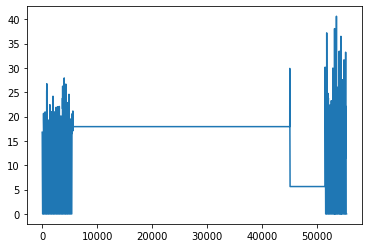

<Figure size 1440x360 with 0 Axes>

In [30]:
import numpy as np
import matplotlib.pyplot as plt

csv_master_path = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/csvdataFULL/BCIML_Dataset/populatedGPPs.csv"
#csv_master_path = r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2/csvdata10000/populatedGPPs.csv"
data_info = pd.read_csv(csv_master_path)
GPP_arr = np.asarray(data_info.iloc[:,1])
fig=plt.figure()
plt.plot(GPP_arr)
plt.figure(figsize=(20,5))
os.chdir(r"C:/Users/Peter/Desktop/Thermo_R_Code/FinalThermo/new2")
fig.savefig('gpp_file.png')
plt.show()